In [5]:
import sys
import os
import sklearn
import numpy as np
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### *KMeans*

In [6]:
from sklearn.datasets import load_iris

data = load_iris()
X = data["data"]
y = data["target"]
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

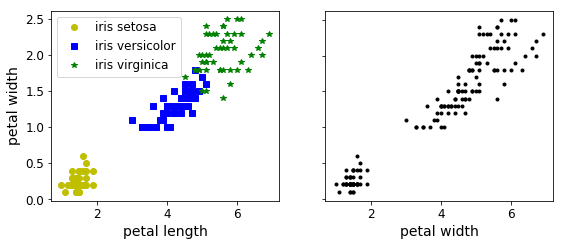

In [7]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label = "iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label = "iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g*", label = "iris virginica")
plt.xlabel("petal length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c= "k", marker = ".")
plt.xlabel("petal width", fontsize = 14)
plt.tick_params(labelleft=False)

plt.show()

In [8]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [9]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

In [10]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [11]:
def plot_fun(X, y = None):
    plt.figure(figsize = (8,4))
    plt.scatter(X[:,0], X[:,1], c = y, s = 1)
    plt.xlabel("$x_1$", fontsize = 14)
    plt.ylabel("$x_2$", fontsize = 14, rotation = 0)
    plt.show()

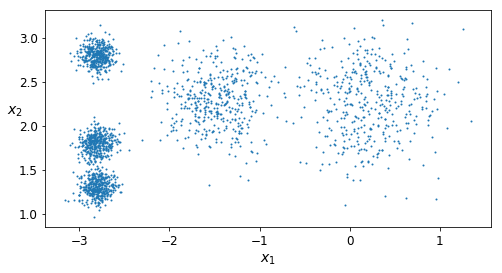

In [12]:
plot_fun(X)

In [13]:
from sklearn.cluster import KMeans

In [14]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

In [15]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [16]:
y_pred is kmeans.labels_

True

In [17]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [18]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [19]:
X_new = [[2,3],[-1,2],[0,5],[3,-1]]
X_new

[[2, 3], [-1, 2], [0, 5], [3, -1]]

In [20]:
kmeans.predict(X_new)

array([1, 3, 1, 1], dtype=int32)

In [21]:
kmeans.transform(X_new)

array([[5.09223009, 1.93979126, 4.79722508, 3.53958744, 4.95122083],
       [1.93137258, 1.23547368, 1.96182856, 0.54736701, 1.81481976],
       [4.63961193, 2.7524151 , 3.55754321, 3.08513884, 4.25373755],
       [6.2400453 , 4.28828298, 6.92607101, 5.545187  , 6.4445186 ]])

In [22]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], "k.", markersize = 2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

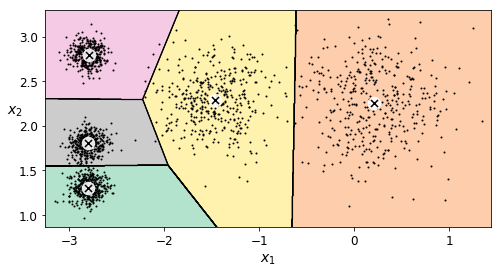

In [23]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [24]:
kmeans_iter1 = KMeans(n_clusters = 5, init = "random", n_init = 1, algorithm = "full", max_iter = 1, random_state = 1)
kmeans_iter2 = KMeans(n_clusters = 5, init = "random", n_init = 1, algorithm = "full", max_iter = 2, random_state = 1)
kmeans_iter3 = KMeans(n_clusters = 5, init = "random", n_init = 1, algorithm = "full", max_iter = 3, random_state = 1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

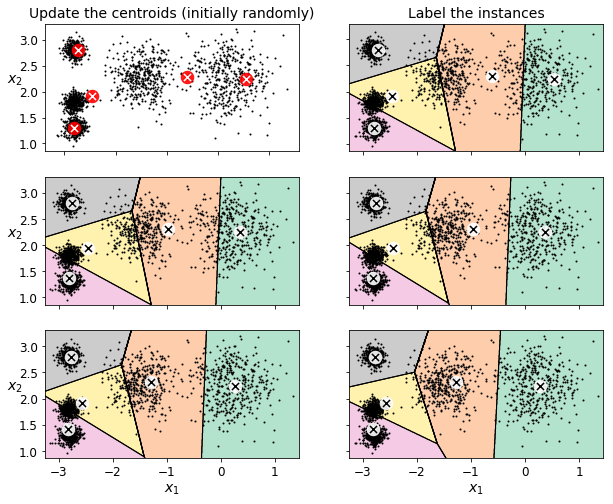

In [25]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [26]:
from sklearn.cluster import MiniBatchKMeans

mini_b = MiniBatchKMeans(n_clusters = 5, random_state = 42)
mini_b.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [27]:
mini_b.inertia_

211.93186531476786

*** Plotting Elbow Curve***

In [28]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

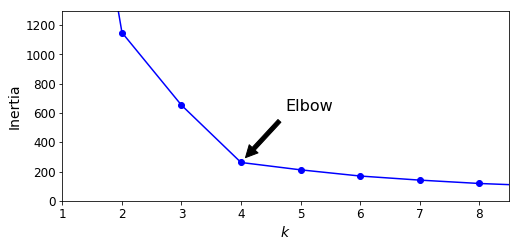

In [29]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

*** Plotting Silhouette Score***

In [30]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [33]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 1).fit(X) for k in range(1,10)]

In [34]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=1),
 KMeans(n_clusters=2, random_state=1),
 KMeans(n_clusters=3, random_state=1),
 KMeans(n_clusters=4, random_state=1),
 KMeans(n_clusters=5, random_state=1),
 KMeans(n_clusters=6, random_state=1),
 KMeans(n_clusters=7, random_state=1),
 KMeans(random_state=1),
 KMeans(n_clusters=9, random_state=1)]

In [35]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

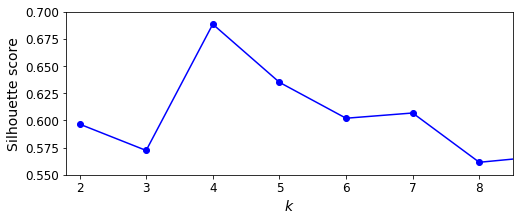

In [36]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

***Plotting Silhouette Diagram***

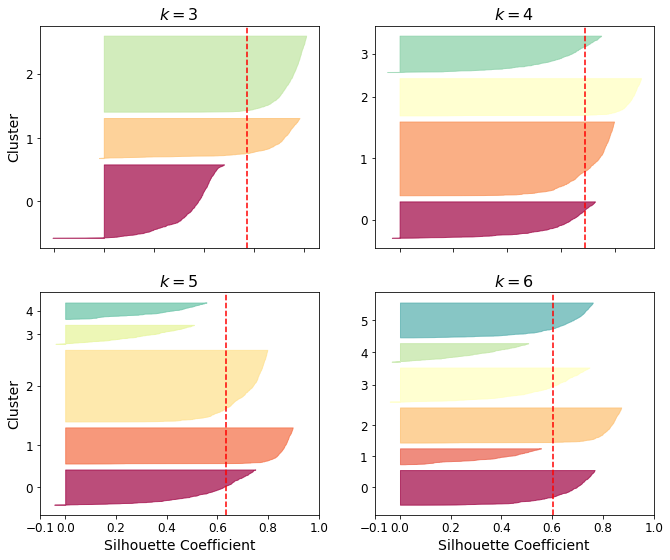

In [37]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

### *Color Segmentation*

In [38]:
from matplotlib.image import imread

In [39]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [40]:
import urllib
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x112691208>)

In [41]:
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))

In [42]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [43]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

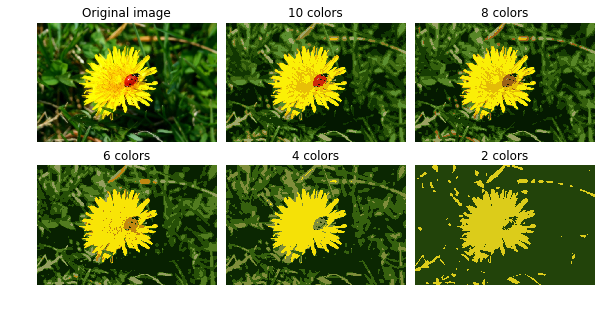

In [44]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
plt.show()

### *Using Clustering for Preprocessing*

In [45]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [46]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.9688888888888889

In [47]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.98

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   2.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.3s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.4s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.3s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.3s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.5s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.4s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   3.1s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   3.5s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   3.4s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.3s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   5.0s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   3.9s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   3.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   3.9s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   4.1s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   3.2s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   3.9s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   4.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   4.6s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   4.3s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   4.8s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   4.1s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   4.3s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   5.2s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   4.6s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   4.9s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   5.2s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   4.8s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 17.2min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [49]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [50]:
grid_clf.score(X_train, y_train)

0.9977728285077951

### *Semi Supervised Learning*

In [51]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [52]:
# cluster training set into 50 clusters
# for each cluster find image closest to centroid -> representative images

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
X_digits_dist

array([[41.52526381, 47.80543271, 53.28606227, ..., 40.84863485,
        33.42329319, 45.35671763],
       [51.57028789, 55.26223803, 42.55626876, ..., 43.60992152,
        53.69754997, 62.09003954],
       [17.68832797, 53.78479191, 46.78038512, ..., 41.03618053,
        43.17301972, 49.18269733],
       ...,
       [46.20281892, 46.98687906, 39.79532121, ..., 35.41242071,
        50.51847709, 54.14682717],
       [42.16801694, 38.66939823, 45.43803427, ..., 33.62986935,
        30.22067077, 42.76745683],
       [50.33500015, 44.86428246, 50.47025399, ..., 32.67650267,
        43.21772438, 51.93318172]])

In [53]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
representative_digit_idx

array([1022, 1312,  535,  817,  704,   74,  175,  407,  753,  589,  841,
        194,  702,  737,  598,  481,   50,  937,  114,  159, 1056,  891,
        577, 1005,  731,  256, 1311,  205,   73, 1267, 1290,  325, 1343,
        357,   26,  559,  159,  137, 1057, 1194, 1235,  648,  525,  715,
        795,  771,  498, 1050,  855,  151])

In [54]:
X_representative_digits.shape

(50, 64)

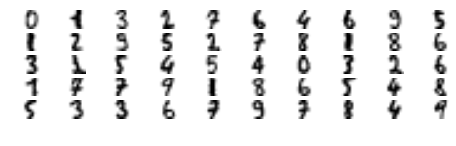

In [55]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [56]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 2, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [57]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9177777777777778

Label Propagation

In [58]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [59]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9311111111111111

In [60]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [61]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [62]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [63]:
log_reg.score(X_test, y_test)

0.8955555555555555

In [64]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.972318339100346

### *DBSCAN*

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [66]:
dbscan.labels_

array([ 0,  0,  0,  1,  1,  0,  1,  1,  2,  3,  0,  4,  0,  0, -1,  1, -1,
        0,  2,  5,  0,  0,  5,  2,  1,  2, -1,  2, -1,  0,  4,  0,  3,  2,
        0,  3,  0,  5,  2,  5,  0,  4,  2,  0,  2,  2,  2,  4,  1,  0,  4,
        0,  3,  0, -1,  4,  4,  6,  6,  6,  0,  4,  6, -1, -1,  4,  1,  5,
        1,  0,  5,  5,  0,  5,  0,  0,  0,  4,  6,  0,  0,  2,  3,  2,  3,
        0,  4,  0,  2,  0,  4,  0,  1,  4,  0,  2,  5, -1,  3,  3,  0,  1,
        5,  0,  1,  2,  2,  0,  0,  0,  0,  4,  0,  0,  2, -1,  0,  0,  2,
        1,  5,  0, -1,  0,  2,  1,  5,  0,  4,  5, -1,  0, -1,  1,  5,  1,
        3,  5, -1,  6,  3,  6,  2,  4,  0, -1,  0,  5,  1,  2,  2,  0,  0,
        2,  1,  0,  0,  0,  2,  3,  2,  0,  1,  4,  0,  0,  1,  1,  0,  2,
        2,  0,  4, -1,  5,  0,  0,  1,  2,  2,  0,  0,  4,  0,  4,  4,  0,
        5,  2,  1,  5,  0,  1,  1, -1,  1,  5,  4,  2,  5,  2, -1,  6,  2,
        1, -1,  0,  2,  5,  1,  0,  0,  3,  5,  2,  0,  0,  4,  0,  2,  4,
        2,  2,  0,  2,  3

In [67]:
len(dbscan.core_sample_indices_)

803

In [68]:
dbscan.core_sample_indices_

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  15,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  27,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  41,  43,  44,  45,  46,
        47,  48,  51,  52,  53,  55,  56,  58,  59,  61,  65,  66,  67,
        70,  71,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  93,  94,  95,  96,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 128, 129,
       133, 135, 136, 139, 140, 141, 144, 146, 147, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 166, 167,
       168, 169, 170, 171, 172, 174, 175, 176, 178, 179, 180, 181, 182,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 197, 199,
       200, 202, 203, 204, 206, 207, 208, 209, 210, 211, 213, 215, 216,
       218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 230, 23

In [69]:
dbscan.components_

array([[ 0.34339497, -0.27640241],
       [ 0.58855476, -0.40819552],
       [ 0.02764502,  0.43162797],
       ...,
       [-0.95228176,  0.23402064],
       [-0.43076582,  0.91009495],
       [ 0.27302873,  0.99113901]])

In [70]:
dbscan2 = DBSCAN(eps = 0.2, min_samples = 5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [71]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

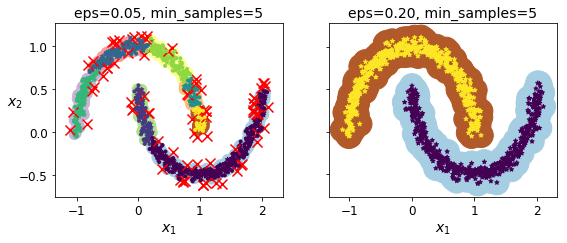

In [73]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [81]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [82]:
X_new

array([[-0.5,  0. ],
       [ 0. ,  0.5],
       [ 1. , -0.1],
       [ 2. ,  1. ]])

In [83]:
knn.predict(X_new)

array([1, 0, 1, 0])

In [84]:
knn.predict_proba(X_new)

array([[0.12, 0.88],
       [1.  , 0.  ],
       [0.24, 0.76],
       [1.  , 0.  ]])

### *Gaussian Mixtures*

In [124]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons

X, y = make_blobs(n_samples = 1000, random_state = 42)

In [125]:
gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [126]:
gm.weights_

array([0.333, 0.333, 0.334])

In [127]:
gm.means_

array([[ 4.7286341 ,  2.05557266],
       [-6.86656253, -6.78519427],
       [-2.52414179,  9.00394283]])

In [128]:
gm.covariances_

array([[[ 0.81032368, -0.06743224],
        [-0.06743224,  1.09348765]],

       [[ 0.95188306,  0.06313685],
        [ 0.06313685,  1.03517333]],

       [[ 1.01568167,  0.00570676],
        [ 0.00570676,  0.94606849]]])

In [129]:
gm.converged_

True

In [130]:
gm.n_iter_

2

In [131]:
gm.predict(X)

array([1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2,
       1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1,
       2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1,
       2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1,
       0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0,
       1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1,

In [132]:
gm.predict_proba(X)

array([[1.54324066e-55, 1.00000000e+00, 7.25149719e-64],
       [2.18712228e-50, 1.00000000e+00, 5.44197407e-59],
       [1.00000000e+00, 1.72023214e-47, 1.12485002e-24],
       ...,
       [1.00000000e+00, 9.57298648e-49, 5.18188969e-12],
       [1.00000000e+00, 1.16470999e-40, 7.40652280e-22],
       [6.70114642e-61, 1.00000000e+00, 4.81101219e-65]])

In [133]:
X_new, y_new = gm.sample(6)

In [134]:
X_new, y_new

(array([[ 5.28907423,  2.91740936],
        [ 5.03673665,  1.04393517],
        [-6.53344592, -7.58957009],
        [-5.09815965, -6.80131325],
        [-0.30585348,  8.56937047],
        [-3.71990218,  7.53917718]]), array([0, 0, 1, 1, 2, 2]))

In [135]:
gm.score_samples(X)

array([ -3.03346683,  -3.2190725 ,  -3.0109888 ,  -3.38203158,
        -4.11961306,  -2.94324709,  -3.06711963,  -3.34798839,
        -3.65409721,  -3.94417225,  -3.06177525,  -4.83894818,
        -3.1217293 ,  -4.45207208,  -3.59216061,  -3.6652099 ,
        -3.25506962,  -3.09013949,  -3.40777907,  -2.99552859,
        -2.89305245,  -3.01845786,  -3.2240066 ,  -5.47493307,
        -3.41051569,  -3.56132321,  -3.17289278,  -3.33720063,
        -3.67698075,  -3.20465876,  -3.57524042,  -5.10306686,
        -3.12461096,  -3.10537609,  -3.63126574,  -4.01754062,
        -3.25096321,  -4.53010889,  -3.81100195,  -4.16718016,
        -5.64225642,  -3.39368665,  -3.11754976,  -3.10129413,
        -5.2953945 ,  -8.08841538,  -3.23182144,  -3.22711158,
        -4.81117218,  -4.30820454,  -3.64805421,  -3.37788768,
        -4.35853181,  -3.31690719,  -3.83546444, -10.27409724,
        -3.58135185,  -3.30199041,  -3.61905642,  -4.5231114 ,
        -3.18320196,  -3.51725046,  -3.43897438,  -3.14

In [136]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

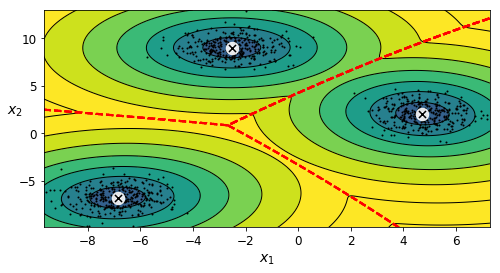

In [137]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

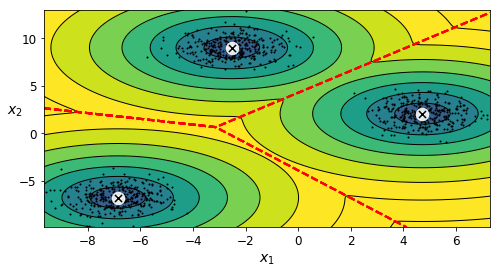

In [138]:
gm2 = GaussianMixture(n_components = 3, n_init = 10, covariance_type = "tied")
gm2.fit(X)
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm2, X)
plt.show()

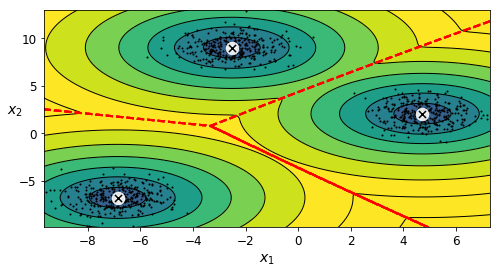

In [139]:
gm3 = GaussianMixture(n_components = 3, n_init = 10, covariance_type = "spherical")
gm3.fit(X)
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm3, X)
plt.show()

GMM for Anomaly Detection

In [140]:
densities = gm.score_samples(X)

In [143]:
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

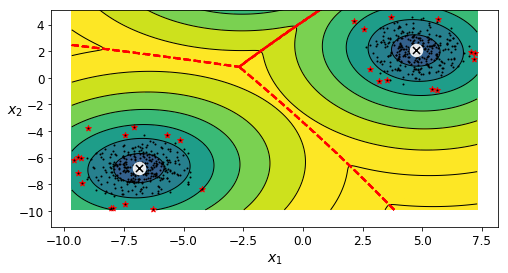

In [144]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

In [146]:
gm3 = GaussianMixture(n_components = 3, n_init = 10)
gm4 = GaussianMixture(n_components = 4, n_init = 10)
gm5 = GaussianMixture(n_components = 2, n_init = 10)
gm3.fit(X)
gm4.fit(X)
gm5.fit(X)

gm3.aic(X), gm4.aic(X), gm5.aic(X)

(7845.394226881462, 7853.648196159962, 9099.8818878832)

In [147]:
gm3.bic(X), gm4.bic(X), gm5.bic(X)

(7928.826066624158, 7966.526567576551, 9153.867195952003)

***Bayesian Gaussian Mixture Models***

In [153]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, random_state = 42)

In [154]:
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [155]:
np.round(bgm.weights_, 2)

array([0.35, 0.33, 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

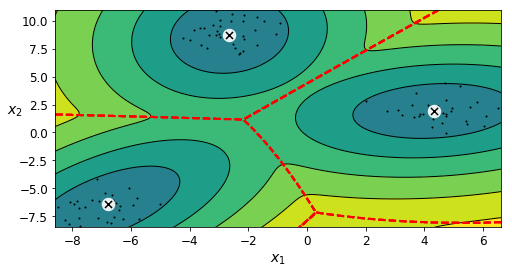

In [156]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(bgm, X)
plt.show()

***Question 10***

In [157]:
from sklearn.datasets import fetch_olivetti_faces

In [189]:
olivetti = fetch_olivetti_faces()

In [190]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [191]:
olivetti['images'][0:5], olivetti['target'][0:5]

(array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
          0.16528925, 0.17355372],
         [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
          0.16115703, 0.16528925],
         [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
          0.16115703, 0.1570248 ]],
 
        [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
          0.18595041, 0.18595041],
         [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
          0.2107438 , 0.2107438 ],
         [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
          0.20661157, 0.20661157],
         ...,
         [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
          0.1446281 , 0.

In [192]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [193]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [194]:
from sklearn.decomposition import PCA

In [197]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [180]:
from sklearn.cluster import KMeans

In [198]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


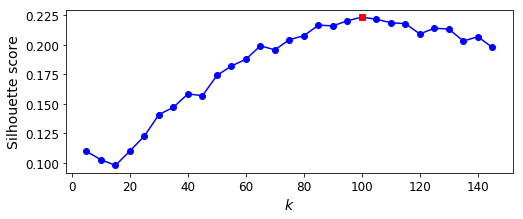

In [199]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [200]:
best_k

100

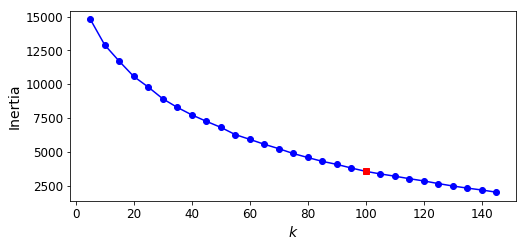

In [201]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [202]:
best_model = kmeans_per_k[best_index]

Cluster 0


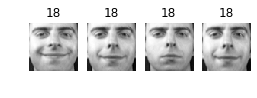

Cluster 1


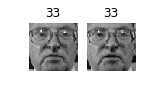

Cluster 2


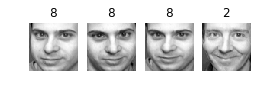

Cluster 3


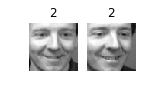

Cluster 4


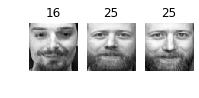

Cluster 5


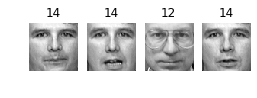

Cluster 6


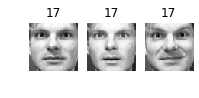

Cluster 7


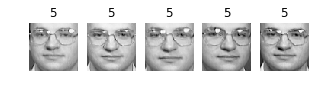

Cluster 8


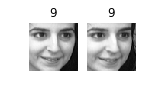

Cluster 9


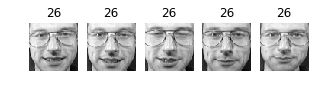

Cluster 10


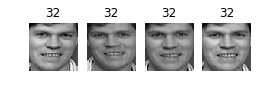

Cluster 11


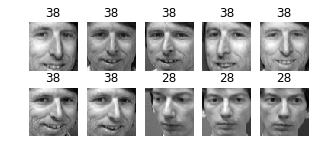

Cluster 12


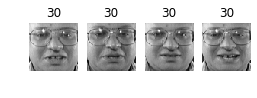

Cluster 13


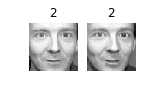

Cluster 14


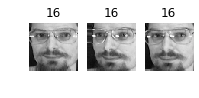

Cluster 15


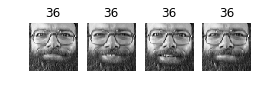

Cluster 16


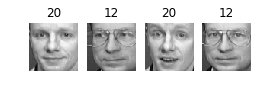

Cluster 17


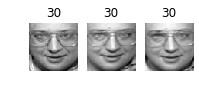

Cluster 18


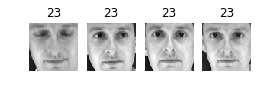

Cluster 19


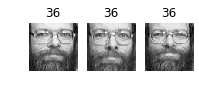

Cluster 20


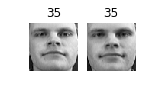

Cluster 21


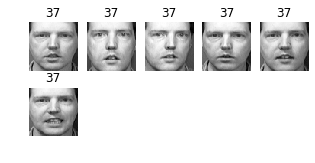

Cluster 22


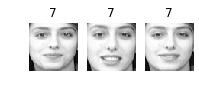

Cluster 23


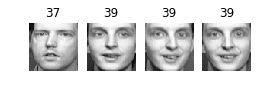

Cluster 24


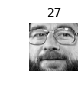

Cluster 25


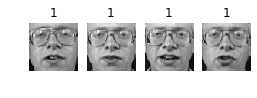

Cluster 26


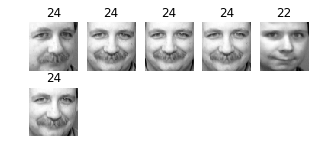

Cluster 27


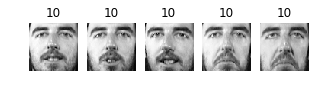

Cluster 28


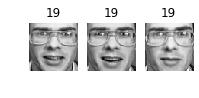

Cluster 29


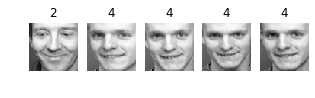

Cluster 30


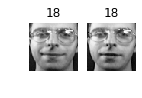

Cluster 31


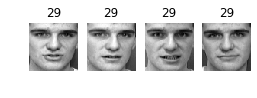

Cluster 32


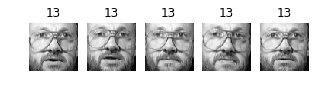

Cluster 33


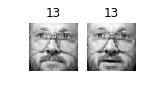

Cluster 34


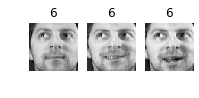

Cluster 35


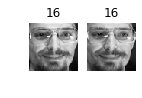

Cluster 36


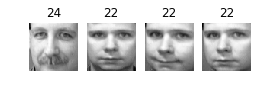

Cluster 37


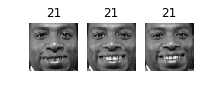

Cluster 38


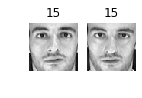

Cluster 39


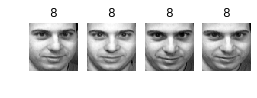

Cluster 40


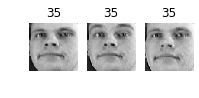

Cluster 41


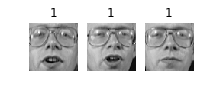

Cluster 42


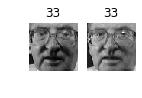

Cluster 43


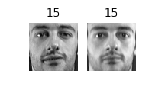

Cluster 44


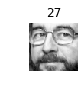

Cluster 45


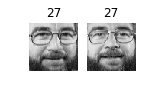

Cluster 46


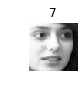

Cluster 47


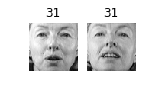

Cluster 48


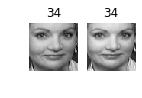

Cluster 49


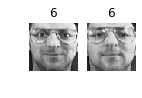

Cluster 50


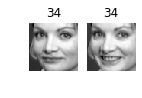

Cluster 51


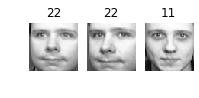

Cluster 52


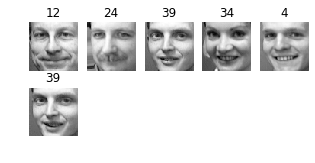

Cluster 53


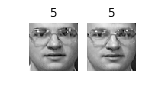

Cluster 54


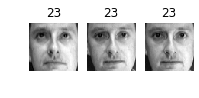

Cluster 55


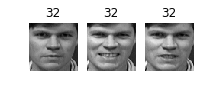

Cluster 56


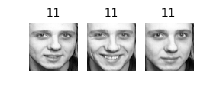

Cluster 57


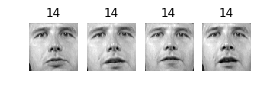

Cluster 58


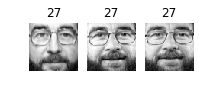

Cluster 59


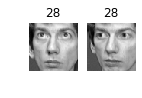

Cluster 60


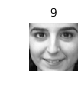

Cluster 61


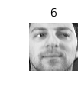

Cluster 62


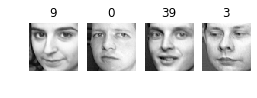

Cluster 63


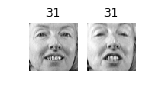

Cluster 64


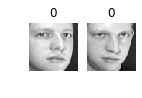

Cluster 65


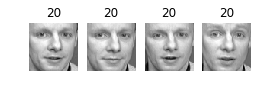

Cluster 66


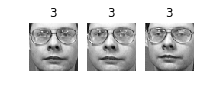

Cluster 67


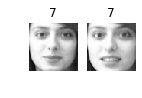

Cluster 68


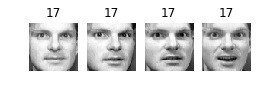

Cluster 69


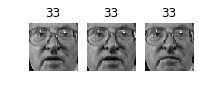

Cluster 70


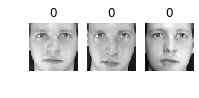

Cluster 71


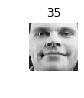

Cluster 72


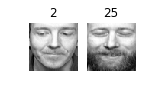

Cluster 73


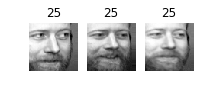

Cluster 74


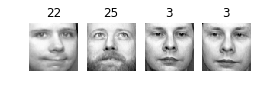

Cluster 75


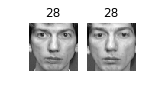

Cluster 76


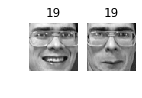

Cluster 77


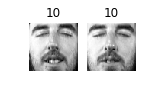

Cluster 78


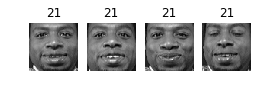

Cluster 79


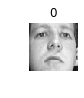

Cluster 80


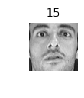

Cluster 81


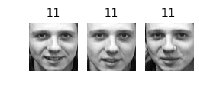

Cluster 82


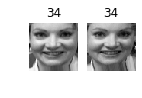

Cluster 83


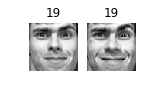

Cluster 84


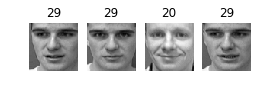

Cluster 85


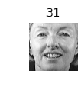

Cluster 86


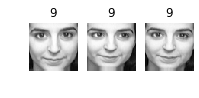

Cluster 87


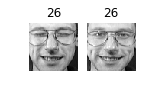

Cluster 88


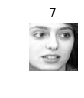

Cluster 89


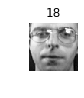

Cluster 90


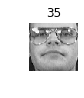

Cluster 91


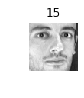

Cluster 92


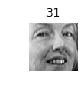

Cluster 93


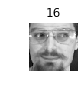

Cluster 94


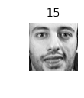

Cluster 95


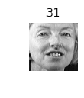

Cluster 96


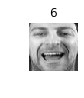

Cluster 97


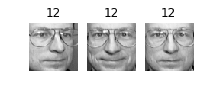

Cluster 98


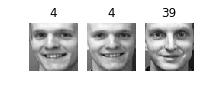

Cluster 99


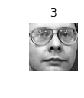

In [203]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)